In [1]:
#Importing Libraries
# import lmfit
from lmfit import Model
from lmfit import Parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cmath

#Function to find location of closest value to a specified value in an array
def find_nearest_T(value,array):
    return (np.argmin(abs(array-value)))

#Matplotlib formatting options
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

#Defining RSJ Model
def RSJ(x,R,Ic):
    b=np.empty(len(x), dtype=float)
    def RSJ_A(r):
        return r*R*cmath.sqrt(1-(Ic/r)**2).real
    for i in range(len(x)):
        b[i]=RSJ_A(x[i])
    return b
model1 = Model(RSJ, independent_vars=('x'))

#Initialising Parameters
params=Parameters()
params.add('R', value=0.0015,min=0,max=1)
params.add('Ic', value=0.0000075, min=0.00, max=1.0)

In [2]:
#Change this to modify which data points from imported file are used in modelling (set m=0 and n=1 to model all data)
m=0
n=1

#If fitting is poor, come back and change m,n to select data from IVs over a smaller current range

In [3]:
## Iteratively finding Rn and Ic for series: Positive Sweep ##

#Importing files
path1 = '/Users/jthompson/Downloads/IcH_Juliet_4nm_JJ4_1p6K_positive_90deg_annealed_400deg'
files1 = os.listdir(path1)

files1 = [filename for filename in files1 if filename.split('.')[-1]=='dat']
files1.sort()


IVs1=np.empty(len(files1),dtype=object)
Rn1=[]
erRn1=[]
Ic1=[]
erIc1=[]
H1=[]

#Iteratively going through files and assigning variable names
for i,filename in enumerate(files1):
    IVs1[i]=np.genfromtxt(path1+'//'+filename, names = ('Resistance', 'Current', 'Voltage'), delimiter=',', dtype=None, skip_header=0)
    #Extracting field from filename
    H1.append(float(str(filename.split('.')[0][-2:])+'.'+str(filename.split('.')[1][0:])))
    I= IVs1[i]['Current']
    dI=IVs1[i]['Current'][1]-IVs1[i]['Current'][0]
    V= IVs1[i]['Voltage']
    R= IVs1[i]['Resistance']

    #Correcting for any voltage offset from zero
    off=0.5*((V[-1])+(V[0]))
    V1 = np.array(V, dtype=float)
    V1 = V1-off
    I1 = np.array(I, dtype=float)
    
    #Fitting individual I-V to RSJ model
    result1 = model1.fit(V1[m:-n],x=I1[m:-n], params=params, nan_policy='propagate')
    
    #Extracting fitted parameters and storing to list
    Rn1.append(result1.params['R'].value)
    erRn1.append(result1.params['R'].stderr)
    Ic1.append(result1.params['Ic'].value)
    erIc1.append(result1.params['Ic'].stderr)

#Converting lists to numpy arrays
Rn1 = np.array(Rn1)
erRn1 = np.array(erRn1)
Ic1 = np.array(Ic1)
erIc1 = np.array(erIc1)

#Combining values into one single array
positive_sweep = np.column_stack((H1,Rn1,erRn1,Ic1,erIc1))

#Converting to pandas DataFrame for easier visualisation
dP=pd.DataFrame(positive_sweep, columns=['H','Rn','erRn','Ic','erIc'])
dP=dP.sort_values(by = ["H"], ascending = True)

#Average Rn and standard dev.
mRn1 = np.mean(Rn1)
eRn1 = np.std(Rn1)
print ("Mean Rn =",1000*mRn1,", StdDev Rn =",1000*eRn1)

dP

Mean Rn = 5.3866922114827265 , StdDev Rn = 0.1373788683374235


,H,Rn,erRn,Ic,erIc
49,-0.050,0.005322,0.000005,0.000442,1.046757e-06
48,-0.049,0.005308,0.000003,0.000423,7.151678e-07
47,-0.048,0.005289,0.000003,0.000410,8.496445e-07
46,-0.047,0.005331,0.000004,0.000417,9.842493e-07
45,-0.046,0.005378,0.000003,0.000426,7.716088e-07
...,...,...,...,...,...
97,0.047,0.005358,0.000004,0.000406,9.411460e-07
98,0.048,0.005340,0.000003,0.000403,6.746303e-07
99,0.049,0.005271,0.000005,0.000430,1.157344e-06
100,0.050,0.005305,0.000003,0.000450,6.879353e-07


Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Ic  0.0004828        0        1 8.004e-07     True     None     None
R   0.005339        0        1 4.072e-06     True     None     None


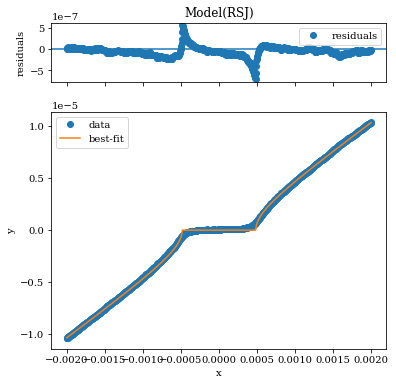

In [4]:
#Visualising RSJ fit for last datafile modelled
fig0 = result1.plot(show_init=False)
result1.params.pretty_print()

In [5]:
## Iteratively finding Rn and Ic for series : Negative Sweep ##
path2 = '/Users/jthompson/Downloads/IcH_Juliet_4nm_JJ4_1p6K_negative_90deg_annealed_400deg'
files2 = os.listdir(path2)

files2 = [filename for filename in files2 if filename.split('.')[-1]=='dat']
files2.sort()

IVs2=np.empty(len(files2),dtype=object)

Rn2=[]
erRn2=[]
Ic2=[]
erIc2=[]
H2=[]

for i,filename in enumerate(files2):
    IVs2[i]=np.genfromtxt(path2+'//'+filename, names = ('Resistance', 'Current', 'Voltage'), delimiter=',', dtype=None, skip_header=0)
    H2.append(float(str(filename.split('.')[0][-2:])+'.'+str(filename.split('.')[1][0:])))
    I= IVs2[i]['Current']
    dI=IVs2[i]['Current'][1]-IVs2[i]['Current'][0]
    V= IVs2[i]['Voltage']
    R= IVs2[i]['Resistance']
    
    off=0.5*((V[-1])+(V[0]))

    V1 = np.array(V, dtype=float)
    V1 = V1-off
    I1 = np.array(I, dtype=float)

    result2 = model1.fit(V1[m:-n],x=I1[m:-n], params=params, nan_policy='propagate')

    Rn2.append(result2.params['R'].value)
    erRn2.append(result2.params['R'].stderr)
    Ic2.append(result2.params['Ic'].value)
    erIc2.append(result2.params['Ic'].stderr)

# print (Rn,':::',erRn,':::',Ic,':::',erIc,':::',)

Rn2 = np.array(Rn2)
erRn2 = np.array(erRn2)
Ic2 = np.array(Ic2)
erIc2 = np.array(erIc2)

negative_sweep = np.column_stack((H2,Rn2,erRn2,Ic2,erIc2))

dN=pd.DataFrame(negative_sweep, columns=['H','Rn','erRn','Ic','erIc'])
dN=dN.sort_values(by = ["H"],ascending = False)

mRn2 = np.mean(Rn2)
eRn2 = np.std(Rn2)
print ("Mean Rn =",1000*mRn2,", StdDev Rn =",1000*eRn2)

dN

Mean Rn = 5.384022408058653 , StdDev Rn = 0.13926357462054567


,H,Rn,erRn,Ic,erIc
101,0.050,0.005147,0.000004,0.000457,8.847321e-07
100,0.049,0.005138,0.000003,0.000403,7.753496e-07
99,0.048,0.005231,0.000003,0.000405,8.393390e-07
98,0.047,0.005320,0.000003,0.000396,9.487709e-07
97,0.046,0.005233,0.000003,0.000428,7.877967e-07
...,...,...,...,...,...
46,-0.047,0.005261,0.000005,0.000399,9.572247e-07
47,-0.048,0.005232,0.000003,0.000399,6.309296e-07
48,-0.049,0.005296,0.000003,0.000415,6.313059e-07
49,-0.050,0.005336,0.000003,0.000445,7.671898e-07


Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Ic  0.0004828        0        1 8.004e-07     True     None     None
R   0.005339        0        1 4.072e-06     True     None     None


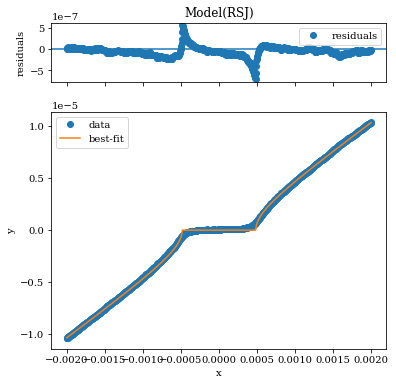

In [6]:
fig0 = result1.plot(show_init=False)
result1.params.pretty_print()

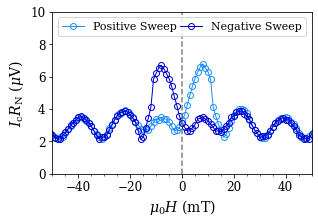

In [7]:
#Plotting IcH for both field directions

fig1=plt.figure(1,figsize=(4.5,3))
ax1=fig1.add_axes([0.15,0.15,0.8,0.75])
ax1.set_xlim(-50,50)
ax1.set_ylim(0,10)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_xlabel('$\mu_0H$ (mT)', size= 14)
ax1.set_ylabel('$I_{\mathrm{c}}R_{\mathrm{N}}$ ($\mu$V)', size=14)
ax1.xaxis.set_minor_locator(MultipleLocator(5))
# ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
# ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.plot(1.0E3*dP['H'],1.0E06*mRn1*dP['Ic'],ls='-', lw=1, mfc='none', color='dodgerblue', marker='o', ms=6, label='Positive Sweep')
ax1.plot(1.0E3*dN['H'],1.0E06*mRn2*dN['Ic'],ls='-', lw=1, mfc='none', color='mediumblue', marker='o', ms=6, label='Negative Sweep')

ax1.axvline(x=0, ls='--', c='grey')
ax1.legend(loc='upper right', ncol=2,fontsize=11, mode='expand')

In [10]:
#Saving figure to local directory (wherever script is located)

# fig1.savefig('R98_CoFeB_JJ_4nm_JJ4_ann_IcH_RSJ.pdf', bbox_inches='tight')
# fig1.savefig('R98_CoFeB_JJ_4nm_JJ4_ann_IcH_RSJ.png', bbox_inches='tight', dpi=360)

In [13]:
#Exporting IcH data into specified directory

# dP.to_csv (r'/Users/jthompson/OneDrive - University of Cambridge/CoFeB Shared Files/4_JJ4_IcH_positive_sweep_400.csv', index = False, header=True)
# dP.to_csv (r'/Users/jthompson/OneDrive - University of Cambridge/CoFeB Shared Files/4_JJ4_IcH_positive_sweep_400.txt', index = False, header=True)
# dN.to_csv (r'/Users/jthompson/OneDrive - University of Cambridge/CoFeB Shared Files/4_JJ4_IcH_negative_sweep_400.csv', index = False, header=True)
# dN.to_csv (r'/Users/jthompson/OneDrive - University of Cambridge/CoFeB Shared Files/4_JJ4_IcH_negative_sweep_400.txt', index = False, header=True)

In [8]:
dP['Ic']=pd.to_numeric(dP['Ic'])

#Finding field values of maximum Ic for both field directions, calculating hysteresis
dP_IcM = dP['Ic'].idxmax(axis=0)
dP_H=(dP['H'][dP_IcM])
print(dP_H)

dN_IcM = dN['Ic'].idxmax(axis=0)
dN_H=(dN['H'][dN_IcM])
print(dN_H)

ddH=abs(dN_H)+abs(dP_H)
print ('ddH =', 1000*ddH, 'mT')

print ('  ...  ...  ...  ')


#Finding overall Rn and error
mRn = 0.5*(mRn1+mRn2)
eRn = 0.5*(eRn1+eRn2)
print('Rn =', mRn,'±',eRn, 'Ohm')

print ('  ...  ...  ...  ')


print (1.0E3*np.max(dP['Ic']), 'mA, max positive')
print (1.0E3*np.max(dN['Ic']), 'mA, max negative')
mIc=(np.max(dP['Ic']))

print ('  ...  ...  ...  ')

erIc=(0.5*(np.mean(dP['erIc'])+np.mean(dN['erIc'])))
print('Ic =', mIc,'±',erIc,'A')

0.008
-0.008
ddH = 16.0 mT
  ...  ...  ...  
Rn = 0.00538535730977069 ± 0.00013832122147898457 Ohm
  ...  ...  ...  
1.2591401523133205 mA, max positive
1.2431325664216675 mA, max negative
  ...  ...  ...  
Ic = 0.0012591401523133205 ± 8.465587974048377e-07 A
